Para esta sección aprovecharemos el comportamiento general de la serie para ver si con la ayuda de un análisis general de los datos, podemos conseguir un modelo de regresión lineal que sea capaz de aprovechar datos demográficos para predecir el número de defunciones acreditadas como suicidios.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
path = "https://docs.google.com/spreadsheets/d/1jTcBnisbtv5wGpu2gYeBw7NfaKjhJZ0BppnUEQHWmTo/export?format=csv"
df = pd.read_csv( path, decimal='.',error_bad_lines=False)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdpforyear,gdppercapita,generation
0,0,1987,1,0,21,312900,6.71,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,2156624900,796,0


Nuevo tratamiento


# Modelo individual

La variable objetivo es el número de suicidios, y en este primer apartado revisaremos como se comportaría un modelo tomando únicamente en cuenta a un estado de toda nuestra base de datos.

In [0]:
df_0 = df[df.country == 0].copy()

Después de seleccionar el estado, trabajaremos con los datos agrupados por año, para darnos una idea de cómo es que a través del tiempo con las distintas variables, aumento o decreció el número de suicidios.

In [0]:
df_0_g = df_0.groupby(['year']).mean()

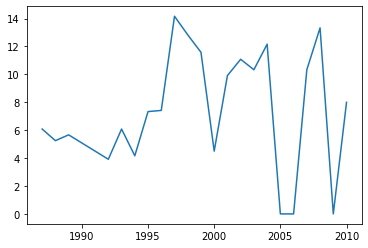

In [6]:
plt.plot( df_0_g['suicides_no'] )

Aquí decidimos no tomar en cuenta ciertas variables, ya que en general al tratar con una agrupación por medias no hay diferencia en estos datos, esto referente al sexo y a la edad, que, aunque en otros contextos relacionados con el tema resultan bastante significativos. Para este cálculo en particular solo reflejan 0.5 en el sexo al hacer referencia a hombres y mujeres en conjunto y en edades como el promedio de las que nos muestran los datos, datos que ya de por si toman en cuenta las mismas edades para todos los estados por lo que simplemente son las mismas medias.

Si estuviéramos trabajando con una base más extensa que nos diera la densidad de población de las distintas edades, podríamos aprovecharla, pero en este caso solo generaría ruido en el modelo.

In [0]:
#X = df[important.feature]
X = df_0_g.drop(['suicides_no','country','sex','age'], axis=1)
y = df_0_g.suicides_no

Escogimos una división 80:20 de los datos para entrenar el modelo.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

Y lo calculamos gracias a sklearning.

In [9]:
model_01 = linear_model.LinearRegression(normalize=True)
model_01.fit(X_train.astype("int64").values, y_train.astype("int64"))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Además de que hacemos la predicción.

In [0]:
y_pred = model_01.predict(X_test)

Si hacemos por facilidad una comparación de las gráficas resultantes pareciera ser una buena predicción, pero para constatar este resultado nos fijamos en la comparación de los datos y el MSE.

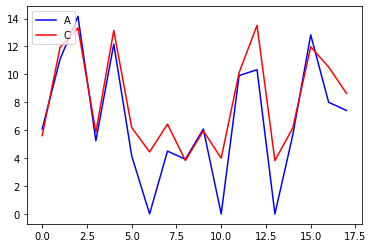

In [11]:
A = y_test.to_numpy()
C = y_pred
l1, = plt.plot(A, 'b')
l3, = plt.plot(C, 'r')
plt.legend(['A', 'C'], loc='upper left')
plt.show()

In [12]:
compare = pd.DataFrame({'Actual': y_test.array.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
compare.head()

,Actual,Predicted
0,6.083333,5.610257
1,11.083333,11.944406
2,14.166667,13.330239
3,5.250000,5.863611
4,12.166667,13.146942


In [13]:
mean_squared_error(y_test.array.to_numpy().flatten(),y_pred.flatten())

4.455600481944405

Por lo que en general podemos ver que se trata de un buen modelo, para su país en particular aunque no sabemos si este modelo será aplicable en general.

# Modelo global

Esta ya es una aproximación en general donde tomamos en cuenta el promedio de los datos para poder hacer el modelo.

In [0]:
df_g = df.groupby(['year']).mean()

In [15]:
df_g.head()

,country,sex,age,suicides_no,population,suicides/100k pop,gdpforyear,gdppercapita,generation
year,,,,,,,,,
1985,48.041667,0.5,2.5,201.498264,1.751042e+06,11.826198,1.926471e+11,6091.229167,1.833333
1986,50.354167,0.5,2.5,209.496528,1.788038e+06,11.423333,2.302251e+11,7126.104167,1.833333
1987,49.203704,0.5,2.5,195.743827,1.689861e+06,11.644213,2.403856e+11,8712.592593,1.833333
1988,47.877551,0.5,2.5,205.826531,1.792678e+06,12.709405,2.985675e+11,9983.857143,1.833333
1989,49.346154,0.5,2.5,256.801282,1.963965e+06,12.879071,3.070805e+11,9725.038462,1.833333


Por las mismas razones que con el modelo anterior no tomamos en cuenta el país, el sexo y la edad.

In [0]:
#X = df[important.feature]
X2 = df_g.drop(['suicides_no','country','sex','age'], axis=1)
y2 = df_g.suicides_no

A partir de aquí ya solo necesitamos continuar con la generación del modelo como lo hicimos hasta ahora.

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.8, random_state = 42)

In [18]:
model_02 = linear_model.LinearRegression(normalize=True)
model_02.fit(X_train_2.astype("int64").values, y_train_2.astype("int64"))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
y_pred_2 = model_02.predict(X_test_2)

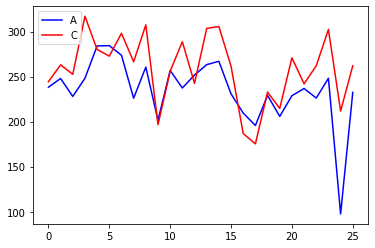

In [20]:
A = y_test_2.to_numpy()
C = y_pred_2
l1, = plt.plot(A, 'b')
l3, = plt.plot(C, 'r')
plt.legend(['A', 'C'], loc='upper left')
plt.show()

In [21]:
compare = pd.DataFrame({'Actual': y_test_2.array.to_numpy().flatten(), 'Predicted': y_pred_2.flatten()})
compare.head()

,Actual,Predicted
0,238.230769,244.369615
1,247.899225,263.083787
2,227.984082,252.551849
3,248.154070,317.031889
4,284.057692,280.108623


In [22]:
mean_squared_error(y_test_2.array.to_numpy().flatten(),y_pred_2.flatten())

1459.9837951035597

El error es mayor, pero gráficamente podemos ver algo bastante aceptable, el aumento del error podemos adjudicarlo tanto a un aumento en las dimensiones de los resultados como el hecho de que es un modelo más general.

# Comparación de modelos

Aquí con los modelos ya generados procedemos a hacer una validación intercambiando ambos test para observar los resultados.

In [0]:
pred_mod_1 = model_01.predict(X_test)
pred_mod_2 = model_02.predict(X_test)

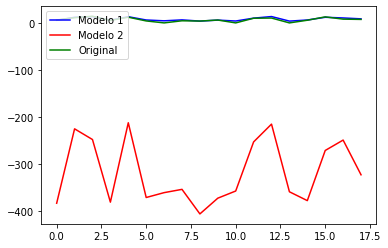

In [24]:
A = pred_mod_1
B = pred_mod_2
C = y_test.array.to_numpy().flatten()
l1, = plt.plot(A, 'b')
l2, = plt.plot(B, 'r')
l3, = plt.plot(C, 'g')
plt.legend(['Modelo 1', 'Modelo 2', 'Original'], loc='upper left')
plt.show()

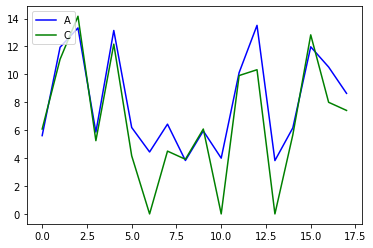

In [25]:
A = pred_mod_1
C = y_test.array.to_numpy().flatten()
l1, = plt.plot(A, 'b')
l3, = plt.plot(C, 'g')
plt.legend(['A', 'C'], loc='upper left')
plt.show()

In [26]:
compare = pd.DataFrame({'Actual': y_test.array.to_numpy().flatten(), 'Modelo1': pred_mod_1.flatten(), 'Modelo2': pred_mod_2.flatten()})
compare.head()

,Actual,Modelo1,Modelo2
0,6.083333,5.610257,-383.698500
1,11.083333,11.944406,-225.401679
2,14.166667,13.330239,-248.140361
3,5.250000,5.863611,-381.378986
4,12.166667,13.146942,-212.473158


Errores

In [27]:
expected = y_test.array.to_numpy().flatten()
predictions1 = pred_mod_1.flatten()
predictions2 = pred_mod_2.flatten()
print('MSE: %d' % mean_squared_error(expected, predictions1) )
print('MSE: %d' % mean_squared_error(expected, predictions2) )

MSE: 4
MSE: 109425


El resultado era algo previsible, como se trata del primer test era claro que el primer modelo iba a tener un mejor desempeño, pero a la vez es sorprendente lo lejos que quedo el segundo modelo del estimado haciendo que prácticamente el uso de este segundo modelo resulte inviable.

Segundo test

In [0]:
pred_mod_1 = model_01.predict(X_test_2)
pred_mod_2 = model_02.predict(X_test_2)

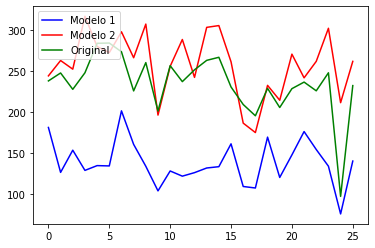

In [29]:
A = pred_mod_1
B = pred_mod_2
C = y_test_2.array.to_numpy().flatten()
l1, = plt.plot(A, 'b')
l2, = plt.plot(B, 'r')
l3, = plt.plot(C, 'g')
plt.legend(['Modelo 1', 'Modelo 2', 'Original'], loc='upper left')
plt.show()

In [30]:
compare = pd.DataFrame({'Actual': y_test_2.array.to_numpy().flatten(), 'Modelo1': pred_mod_1.flatten(), 'Modelo2': pred_mod_2.flatten()})
compare.head()

,Actual,Modelo1,Modelo2
0,238.230769,181.500076,244.369615
1,247.899225,126.766530,263.083787
2,227.984082,153.816733,252.551849
3,248.154070,129.197499,317.031889
4,284.057692,135.023651,280.108623


Error

In [31]:
expected = y_test_2.array.to_numpy().flatten()
predictions1 = pred_mod_1.flatten()
predictions2 = pred_mod_2.flatten()
print('MSE: %d' % mean_squared_error(expected, predictions1) )
print('MSE: %d' % mean_squared_error(expected, predictions2) )

MSE: 10303
MSE: 1459


De igual manera el resultado es esperable pero algo más significativo, obviamente el segundo modelo con su test propio iba a resultar mejor, pero a diferencia del ejemplo anterior gráficamente se ven mucho más cercanos los resultados por lo que podemos decir que el primer modelo con los datos únicos resulta bastante más útil, si solo pudiéramos elegir uno, pero aún queda una prueba y será la aproximación de los datos de México con nuestros modelos generados.

In [0]:
df_58 = df[df.country == 58].copy()
df_58_g = df_58.groupby(['year']).mean()
X_58 = df_58_g.drop(['suicides_no','country','sex','age'], axis=1)
y_58 = df_58_g.suicides_no
X_train_58, X_test_58, y_train_58, y_test_58 = train_test_split(X_58, y_58, test_size = 0.8, random_state = 42)


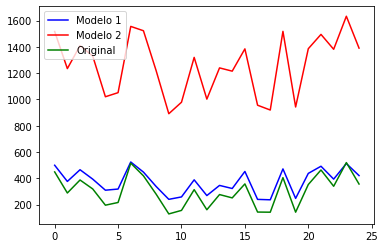

In [42]:
pred_mod_1_58 = model_01.predict(X_test_58)
pred_mod_2_58 = model_02.predict(X_test_58)

A = pred_mod_1_58
B = pred_mod_2_58
C = y_test_58.array.to_numpy().flatten()
l1, = plt.plot(A, 'b')
l2, = plt.plot(B, 'r')
l3, = plt.plot(C, 'g')
plt.legend(['Modelo 1', 'Modelo 2', 'Original'], loc='upper left')
plt.show()

In [43]:
expected = y_test_100.array.to_numpy().flatten()
predictions1 = pred_mod_1_100.flatten()
predictions2 = pred_mod_2_100.flatten()
print('MSE: %d' % mean_squared_error(expected, predictions1) )
print('MSE: %d' % mean_squared_error(expected, predictions2) )

MSE: 2652
MSE: 5921


Para este caso particular el modelo 1 tiene un mejor ajuste, pero aun así cuenta con una diferencia algo importante, pero la gráfica nos da un resultado bastante esperanzador, ya que el resultado del modelo es muy similar lo cual esperábamos conseguir solo que no con el modelo general, si no que con uno particular.